<div style="display: flex; align-items: flex-start;"> <a href='[newlinnk]' target='_blank'> <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSp1RpMyU7wB362yr2OK_fBs0uB5bql3ja5SA&s" style="border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);" width="600" height="500"> </a> <div style="margin-left: 20px;"> <p style="color: #B22222; font-size: 16px;"><strong>Project Objective:</strong> The objective of this project is to develop a machine learning model that can predict sales figures based on investments in TV, radio, and newspaper advertising. The goal is to analyze how different levels of investment in these channels influence sales and determine the most effective advertising method.</p>
    
<p><strong>Exploratory Data Analysis (EDA):</strong> Examined missing values, distributions, and correlations within the dataset.</p>

<p><strong>Data Cleaning:</strong> Addressed missing values by imputing or removing them as appropriate, with a focus on critical data such as investment amounts and sales figures.</p>

<p><strong>Feature Engineering:</strong> Transformed existing variables and created new features (e.g., interaction terms between advertising channels) to enhance model performance.</p>

<p><strong>Feature Selection:</strong> Identified the most influential features to improve model accuracy.</p>

<p><strong>Modeling:</strong> Developed models using various regression algorithms including linear regression, decision trees, random forests, and support vector machines.</p>

<p><strong>Model Evaluation:</strong> Evaluated models using metrics such as R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) to select the best-performing model.</p>

<p><strong>Hyperparameter Optimization:</strong> Improved model performance through techniques like Grid Search and Random Search to optimize hyperparameters.</p>

<p style="color: green; text-align: center; margin-top: 20px;"> Click on the image to access the data files and the project's Kaggle page. </p> </div> </div>

# EDA - Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Visiulation and Modelling

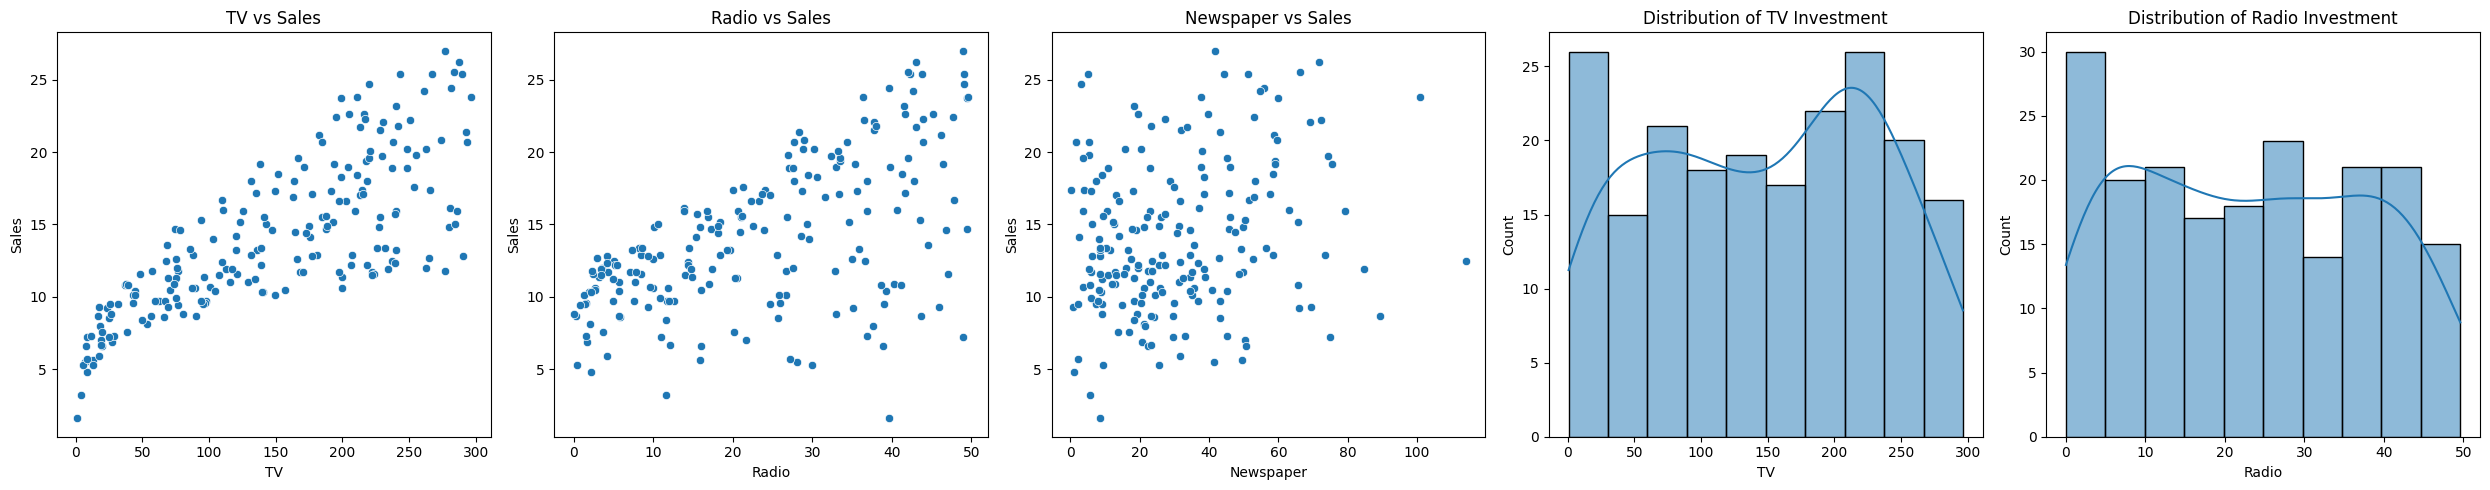

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

sns.scatterplot(x='TV', y='Sales', data=df, ax=axes[0])
axes[0].set_title('TV vs Sales')

sns.scatterplot(x='Radio', y='Sales', data=df, ax=axes[1])
axes[1].set_title('Radio vs Sales')

sns.scatterplot(x='Newspaper', y='Sales', data=df, ax=axes[2])
axes[2].set_title('Newspaper vs Sales')

sns.histplot(df['TV'], bins=10, kde=True, ax=axes[3])
axes[3].set_title('Distribution of TV Investment')

sns.histplot(df['Radio'], bins=10, kde=True, ax=axes[4])
axes[4].set_title('Distribution of Radio Investment')

plt.tight_layout()
plt.show()


In [8]:
x=df.drop("Sales",axis=1)
y=df.Sales

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import Lasso, ElasticNet, Ridge, LinearRegression


X=df.drop("Sales",axis=1)
y=df.Sales

models = {
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBRegressor': XGBRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Extra Tree': ExtraTreeRegressor(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Ridge': Ridge(),
    'Linear': LinearRegression()
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    results.append({'Model': name, 'R_Squared': r2, 'RMSE': rmse, 'MAE': mae})

results_df = pd.DataFrame(results).set_index('Model')

print(results_df)


                     R_Squared      RMSE       MAE
Model                                             
Gradient Boosting     0.983941  0.711956  0.607417
XGBRegressor          0.972470  0.932166  0.725829
KNeighborsRegressor   0.910620  1.679625  1.189000
Decision Tree         0.949325  1.264713  0.940000
Extra Tree            0.956247  1.175160  0.820000
Lasso                 0.900401  1.773046  1.452202
ElasticNet            0.899961  1.776959  1.456659
Ridge                 0.899438  1.781599  1.460766
Linear                0.899438  1.781600  1.460757


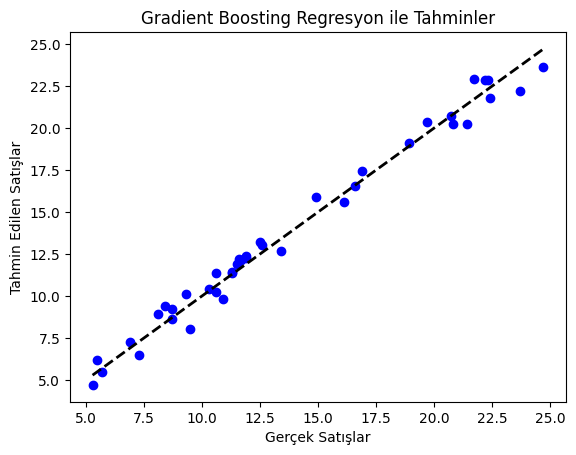

R^2: 0.984036084534245
RMSE: 0.7098440268259164
MAE: 0.6064739541723838


In [10]:

model = GradientBoostingRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Satışlar')
plt.ylabel('Tahmin Edilen Satışlar')
plt.title('Gradient Boosting Regresyon ile Tahminler')
plt.show()

print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")